# Teoría cuántica básica, Observables y Medidas
## Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [80]:
import numpy as np

class SistemaCuantico:
    def __init__(self, numPosiciones):
        self.numPosiciones = numPosiciones
        self.estado = np.zeros(numPosiciones, dtype=complex)

    def asignarEstado(self, amplitudes): 
        if len(amplitudes) != self.numPosiciones:
            print("La longitud del vector de estado debe coincidir con el número de posiciones.")
        else:
            self.estado = np.array(amplitudes, dtype=complex)
    
    def probabilidad(self, posicion):
        if posicion < 0 or posicion >= self.numPosiciones:
            print("La posición está fuera de rango.")
            return None
        else:
            amplitud = self.estado[posicion]
            return np.abs(amplitud)**2

    def probabilidadTransicion(self, nuevoEstado):
        if len(nuevoEstado) != self.numPosiciones:
            print("La longitud del nuevo vector de estado debe coincidir con el número de posiciones.")
            return None
        else:
            superposicion = np.dot(np.conjugate(self.estado), nuevoEstado)
            return np.abs(superposicion)**2

def datos():
    numPosiciones = int(input("Número de posiciones: "))
    amplitudes = []
    print(f"Ingrese las amplitudes complejas para las {numPosiciones} posiciones (Ejemplo de entrada: 1+0j).")
    for i in range(numPosiciones):
        amplitud = complex(input(f"Amplitud para la posición {i}: "))
        amplitudes.append(amplitud)
    return numPosiciones, amplitudes

def nuevoEstado(numPosiciones):
    nuevoEstado = []
    print(f"Ingrese las amplitudes complejas para el nuevo estado de {numPosiciones} posiciones (Ejemplo de entrada: 1+0j).")
    for i in range(numPosiciones):
        amplitud = complex(input(f"Amplitud para la posición {i}: "))
        nuevoEstado.append(amplitud)
    return nuevoEstado

# Ejecutar el sistema
numPosiciones, amplitudes = datos()
sistema = SistemaCuantico(numPosiciones)
sistema.asignarEstado(amplitudes)

# Probabilidad de encontrar la partícula en una posición
posicion = int(input(f"Posición para calcular la probabilidad (0 a {numPosiciones - 1}): "))
probabilidad = sistema.probabilidad(posicion)
if probabilidad is not None:
    print(f"Probabilidad de encontrar la partícula en la posición {posicion}: {probabilidad:.2f} \n")

# Calcular la probabilidad de transición
calcularTransicion = input("¿Calcular la probabilidad de transición a otro estado? (s/n): ").lower()
if calcularTransicion == 's':
    nuevoEstado = nuevoEstado(numPosiciones)
    probabilidadTransicion = sistema.probabilidadTransicion(nuevoEstado)
    if probabilidadTransicion is not None:
        print(f"Probabilidad de transición al nuevo estado: {probabilidadTransicion:.2f}")


Número de posiciones:  3


Ingrese las amplitudes complejas para las 3 posiciones (Ejemplo de entrada: 1+0j).


Amplitud para la posición 0:  1+0j
Amplitud para la posición 1:  0+0j
Amplitud para la posición 2:  1+0j
Posición para calcular la probabilidad (0 a 2):  2


Probabilidad de encontrar la partícula en la posición 2: 1.00 



¿Calcular la probabilidad de transición a otro estado? (s/n):  s


Ingrese las amplitudes complejas para el nuevo estado de 3 posiciones (Ejemplo de entrada: 1+0j).


Amplitud para la posición 0:  1+0j
Amplitud para la posición 1:  0+1j
Amplitud para la posición 2:  0+0j


Probabilidad de transición al nuevo estado: 1.00


## Complete los retos de programación del capítulo 4.

**1.** Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [91]:
import numpy as np

v1 = input("Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0)")
elemV1 = v1.split() 
vector1 = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elemV1])
v2 = input("Elementos del segundo vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0)")
elemV2 = v2.split()
vector2 = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elemV2])

#Comprobar si están normalizados
normaV1 = np.linalg.norm(vector1)
if(normaV1 != 1):
    vector1 = normaV1 * vector1
normaV2 = np.linalg.norm(vector2)
if(normaV2 != 1):
    vector2 = normaV2 * vector2
    
#Producto interno entre vector1 y vector2
producto = np.vdot(vector1, vector2)
probabilidad = abs(producto)**2
print("La probabilidad de transicion es:" + str(probabilidad))

Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0) 1,0 0,0 1,0
Elementos del segundo vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0) 0,1 1,0 0,0


La probabilidad de transicion es:4.000000000000002


**2.** Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [105]:
import numpy as np

v = input("Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0):")
elemV = v.split() 
vector = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elemV])

print(f"Introduce los elementos de la matriz {len(vector)}x{len(vector)}, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0")
matriz = []
for i in range(len(vector)):
    fila = input(f"Fila {i+1}: ").split()
    fila_complex = [complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in fila]
    matriz.append(fila_complex)
matriz = np.array(matriz)

#Normalización el vector
normaV1 = np.linalg.norm(vector)
if(normaV1 != 1):
    vector = normaV1 * vector
    
#Matriz hermitiana
esHermitiana = np.allclose(matriz, matriz.conj().T)
if(esHermitiana):
    print("La matriz es hermitiana.")
    
    media = np.dot(vector,np.dot(matriz,vector))
    print("Media:"+ str(media))
    
    varianza = matriz - (media*np.identity(len(vector)))
    varianza = varianza * varianza
    total = np.dot(vector,np.dot(varianza,vector))
    print("Varianza:" + str(total))
else:
    print("La matriz no es hermitiana.")

Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0): 1,0 0,0 1,0


Introduce los elementos de la matriz 3x3, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0


Fila 1:  2,0 1,1 0,0
Fila 2:  1,-1 3,0 1,0
Fila 3:  0,0 1,0 4,0


La matriz es hermitiana.
Media:(12.000000000000002+0j)
Varianza:(328.00000000000017+0j)


**3.** El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [122]:
import numpy as np

v = input("Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0):")
elementosV = v.split() 
vector = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV])

print(f"Introduce los elementos de la matriz {len(vector)}x{len(vector)}, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0")
matriz = []
for i in range(len(vector)):
    fila = input(f"Fila {i+1}: ").split()
    fila_complex = [complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in fila]
    matriz.append(fila_complex)
matriz = np.array(matriz)

#Comprobar si es hermitiana
esHermitiana = np.allclose(matriz, matriz.conj().T)
if(esHermitiana):
    print("La matriz es hermitiana.")
    #Valores y vectores propios
    eigenvalues, eigenvectors = np.linalg.eig(matriz)
    print("Valores propios del observable:" + str(eigenvalues))
    print("Vectores propios del observable:" + str(eigenvectors))
    
    #Cálculo de probabilidad 
    probabilidadTotal = 0
    for i in range(len(eigenvectors)):
        norma = np.linalg.norm(eigenvectors[i])
        if(normaV1 != 1):
            eigenvectors[i] = norma * eigenvectors[i]
            probabilidad = pow(np.dot(eigenvectors[i],vector),2)
            print("La probabilidad del vector"+str(eigenvectors[i])+"es:"+str(probabilidad))
            probabilidadTotal += probabilidad
    print("La suma de probabilidades es:"+str(probabilidadTotal))
else:
    print("La matriz no es hermitiana.")

Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0): 1,0 0,0 1,0


Introduce los elementos de la matriz 3x3, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0


Fila 1:  2,0 1,1 0,0
Fila 2:  1,-1 3,0 1,0
Fila 3:  0,0 1,0 4,0


La matriz es hermitiana.
Valores propios del observable:[0.88509246+9.72081287e-17j 3.25410169-8.00313152e-17j
 4.86080585-1.71768135e-17j]
Vectores propios del observable:[[ 0.77024208+0.00000000e+00j -0.39529571-3.95295709e-01j
   0.21703657+2.17036571e-01j]
 [-0.42937435+4.29374351e-01j -0.49574102-1.61558193e-16j
   0.62089949+4.94070013e-17j]
 [ 0.13784497-1.37844975e-01j  0.66462279+0.00000000e+00j
   0.72130027+0.00000000e+00j]]
La probabilidad del vector[ 0.77024208+0.j         -0.39529571-0.39529571j  0.21703657+0.21703657j]es:(0.9276142579242448+0.4285511445747042j)
La probabilidad del vector[-0.42937435+4.29374351e-01j -0.49574102-1.61558193e-16j
  0.62089949+4.94070013e-17j]es:(-0.1476804537698397+0.1644719659777065j)
La probabilidad del vector[0.13784497-0.13784497j 0.66462279+0.j         0.72130027+0.j        ]es:(0.7191293091951351-0.23685770805346118j)
La suma de probabilidades es:(1.49906311334954+0.35616540249894957j)





**4.** Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [126]:
import numpy as np

v = input("Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0):")
elementosV = v.split() 
vector = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV])

n = int(input("Cantidad de matrices unitarias:"))
matricesUnitarias = []

for i in range(n):
    print(f"Introduce los elementos de la matriz {len(vector)}x{len(vector)}, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0")
    matriz = []
    for j in range(len(vector)):
        fila = input(f"Fila {j+1}: ").split()
        fila_complex = [complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in fila]
        matriz.append(fila_complex)
    matriz = np.array(matriz)
    matricesUnitarias.append(matriz)
    
estadoFinal = vector

#Cálculo estado final
for U in matricesUnitarias:
    estadoFinal = np.dot(U,estadoFinal)
print("El estado final es:")
print(estadoFinal)

Elementos del primer vector (Ejemplo de entrada para [1+0j,0+0j,1+0j] → 1,0 0,0 1,0): 1,0 0,0 0,1
Cantidad de matrices unitarias: 2


Introduce los elementos de la matriz 3x3, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0


Fila 1:  1,0 0,0 0,0
Fila 2:  0,0 0,0 1,0
Fila 3:  0,0 1,0 0,0


Introduce los elementos de la matriz 3x3, fila por fila, siendo cada fila: [1+0j,0+0j,1+0j] → 1,0 0,0 1,0


Fila 1:  0,0 1,0 0,0
Fila 2:  1,0 0,0 0,0
Fila 3:  0,0 0,0 1,0


El estado final es:
[0.+1.j 1.+0.j 0.+0.j]


## Realice los siguientes problemas e incluyalos como ejemplos
Modele en su librería los problemas


### 4.3.1

In [37]:
import numpy as np
#4.3.1
up = np.array([[1], [0]])  # |up>
izq = (1/np.sqrt(2)) * np.array([[1], [1]])  # |izquierda>
der = (1/np.sqrt(2)) * np.array([[1], [-1]])  # |derecha>

# Probabilidad de colapso
def probabilidadColapso(estadoFin, estadoIni):
    superposicion = np.vdot(estadoFin, estadoIni)
    return np.abs(superposicion)**2

# Calculo probabilidades
PIzq= probabilidadColapso(izq, up)
PDer = probabilidadColapso(der, up)

print(f"Probabilidad de colapso al estado |←>: {PIzq:.2f}")
print(f"Probabilidad de colapso al estado |→>: {PDer:.2f}")


Probabilidad de colapso al estado |←>: 0.50
Probabilidad de colapso al estado |→>: 0.50


### 4.3.2

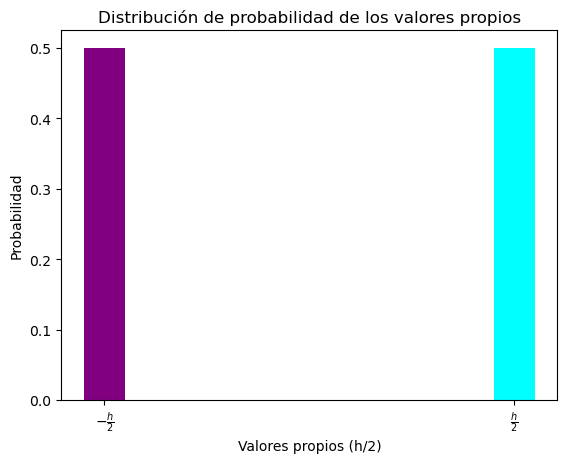

In [73]:
import numpy as np
import matplotlib.pyplot as plt
#4.3.2
up = np.array([[1], [0]])  # |up>
izq = (1/np.sqrt(2)) * np.array([[1], [1]])  # |izquierda>
der = (1/np.sqrt(2)) * np.array([[1], [-1]])  # |derecha>

# Valores propios correspondientes a los estados |right> y |left>
eigenvalues = [0.5, -0.5]  # hbar/2 y -hbar/2
probabilities = [probabilidadColapso(der, up), probabilidadColapso(izq, up)]  # Probabilidad de colapso a |right> y |left>

plt.bar(eigenvalues, probabilities, color=['cyan', 'purple'], width=0.1)
plt.xlabel('Valores propios (h/2)')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad de los valores propios')
plt.xticks(eigenvalues, [r'$\frac{h}{2}$', r'$-\frac{h}{2}$'])
plt.show()


### 4.4.1

In [63]:
import numpy as np
#4.4.1
# Matrices u1 y u2
u1 = np.array([[0, 1],
               [1, 0]])
u2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
               [np.sqrt(2)/2, -np.sqrt(2)/2]])

def esUnitaria(U):
    identidad = np.eye(U.shape[0])
    daga = np.conjugate(U.T)
    return np.allclose(U @ daga, identidad)

# Comprobar si U1 y U2 son matrices unitarias
u1Unitaria = esUnitaria(u1)
u2Unitaria = esUnitaria(u2)
# Comprobar si el producto entre u1 y u2 es unitario
u1u2Producto = np.dot(u1, u2)
productoUnitario = esUnitaria(u1u2Producto)

print("U1 es unitaria:", u1Unitaria)
print("U2 es unitaria:", u2Unitaria)
print("El producto U1*U2 es unitario:", productoUnitario)

U1 es unitaria: True
U2 es unitaria: True
El producto U1*U2 es unitario: True


### 4.4.2

In [71]:
#4.4.2
estadoIni = np.array([1, 0, 0, 0], dtype=complex)
U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]], dtype=complex)

# Tres clicks
Click1 = np.dot(U, estadoIni)
Click2= np.dot(U, Click1)
Click3 = np.dot(U, Click2)

ProbabilidadPunto3 = np.abs(Click3[2])**2

print(f"Estado después de 3 clicks: {Click3:}\n")
print(f"Probabilidad de encontrar la partícula en el punto 3: {ProbabilidadPunto3}")

Estado después de 3 clicks: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]

Probabilidad de encontrar la partícula en el punto 3: 0.0


### Discusión 4.5.2

Un sistema de dos partículas con espín se puede describir usando el espacio de Hilbert, donde el estado total es el producto tensorial de los estados de las dos partículas. Cada partícula tiene dos posibles estados de espín: up y down. El estado genérico para un sistema de dos partículas es una combinación lineal de los productos de sus estados de espín, donde los coeficientes son complejos y deben cumplir con la normalización. Para un sistema con n partículas, simplemente se expande este concepto. El estado total del sistema sería el producto tensorial de los estados de las n partículas. Si cada partícula tiene dos estados posibles (como en el caso del espín), el número de términos en la combinación lineal sería 2n.



### Discusión 4.5.3
Un estado es separable si se puede escribir como el producto tensorial de dos estados independientes. Si no es posible de descomponer el estado se considera entrelazado. Se observa que el estado dado es una suma de productos de estados, pero ambos términos incluyen un mismo estado, lo que da a enter que puede haber una relación más simple entre los estados.

Si se intenta escribir como un producto tensorial de un estado, resulta que el estado no es separable porque no es posible factorizarlo en la forma deseada. Lo que indicaria que el estado está entrelazado, pues no puede descomponerse.